# Lecture 5: Data Visualization in Python with Matplotlib and Seaborn

# Announcements
- The homework is due on Friday (Oct. 31, 2025), students with OAE letter are automatically granted a 7-day extension.
- You also have 8 free late days that you can use for the homework.
- Don't forget to take a picture of the attendance code.

# Lecture Overview
- We have covered basic **data management and manipulation** with Pandas in the previous lecture.
- In a data science research pipeline, understanding your observations (e.g., by looking at them) in the dataset is a crucial step before building any models.
- Visualizing the dataset helps you understand the data and make better choices for the features and models. In this lecture, we will cover the basics of data visualization with Matplotlib and Seaborn.
- For example,
  - a skewed distribution of a feature may suggest that you should take the logarithm of the feature.
  - a complex relationship between features may suggest that you should use a machine learning model to capture the relationship.
- In this lecture, we will cover the basics of data visualization with
  - `Matplotlib`: the default basic library for data visualization in Python.
  - and `Seaborn`: a library built on top of Matplotlib that provides a high-level interface for creating statistical graphics (ready for publication!).

# Setup the Environment
## Install Required Libraries

In [1]:
# install the seaborn library for advanced data visualization.
# ! pip install seaborn
# install the science-plot style package for publication-ready plot styles.
# ! pip install SciencePlots

## Import the Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print(f"Library versions -> pandas {pd.__version__}, seaborn {sns.__version__}")

Library versions -> pandas 2.3.3, seaborn 0.13.2


## Setup Plot Theme
- There are a few default matplotlib themes (mainly controlling the color scheme); you can set them using `plt.style.use("THEME NAME")`.
- You can find the list of pre-installed themes using `plt.style.available`.
- There are better third-party color schemes available out there, such as the `SciencePlots` library. Please see the GitHub page of the [SciencePlots](https://github.com/garrettj403/SciencePlots) package for more options on plot styles.
- Here we use the `science` `no-latex` theme.

In [3]:
# Set up the theme for the plots.

import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['nature', 'no-latex'])  # use the no-latex option if you don't have a local latex installation.
# set default DPI to 150, I would recommend a DPI >= 300 for publication-quality images.
plt.rcParams['figure.dpi'] = 150

# for nicer display of the dataframe in Jupyter notebook
pd.set_option("display.max_rows", 8)
pd.set_option("display.width", 120)

# Quick Introduction to Matplotlib: Figure and Axes

- Seaborn draws on Matplotlib, so let's get familiar with `matplotlib` terminologies.
- The **Figure** is the overall canvas, which is the top-level container that owns the canvas (size, DPI, background), the overall coordinate system, all artists (including axes), and it orchestrates layout and rendering order. You can also save the entire figure.
- The **Axes** is an individual plot on the canvas, it is a rectangular plotting region inside a figure that defines how data values are turned into on-screen positions via its scales and limits, provides spines/ticks/labels and grids, and holds the plot’s artists.

- You'll mainly need:
    - `fig, ax = plt.subplots()` to get an Axes to draw on (one axes on the canvas).
    - Methods like `ax.plot`, `ax.set_title`, `ax.set_xlabel`, `ax.set_ylabel` for simple customization on ax level.
    - Methods like `fig.suptitle()` and `fig.savefig` for figure level operations.


<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png" width="50%">




## Example: Create a Figure with One Axes using `fig, ax = plt.subplots()`

### Quick API Reference

- **plt.subplots(nrows=1, ncols=1, figsize=None, dpi=None, sharex=False, sharey=False, constrained_layout=False, layout=None)**
  - **nrows/ncols**: grid shape; **figsize**: size in inches; **dpi**: resolution
  - **sharex/sharey**: share axis limits; **constrained_layout/layout**: auto spacing
- **Axes.plot(x, y, label=None, color=None, marker=None, ls='-', lw=None, alpha=None)**
  - **marker**: point symbol; **color**: line/marker color; **alpha**: transparency; **label**: legend text
- **Axes.set_title(label, fontsize=None, loc='center', pad=None)**
  - **loc**: alignment; **pad**: spacing; **fontsize**: title size
- **Axes.set_xlabel(xlabel, labelpad=None)** / **Axes.set_ylabel(ylabel, labelpad=None)**
  - **labelpad**: label–axis spacing
- **Axes.legend(loc='best', title=None, frameon=True, ncol=1)**
  - **loc**: placement; **ncol**: column count; **frameon**: draw frame
- **Axes.axhline(y=0, xmin=0, xmax=1, color=None, lw=None, ls=None)**
  - Horizontal reference line; **xmin/xmax** in axes coords
- **Axes.annotate(text, xy, xytext=None, textcoords='data', arrowprops=None, ha=None, va=None)**
  - **xy**: data point; **xytext/textcoords**: label position; **arrowprops**: arrow style
- **Figure.suptitle(t, y=0.98, fontsize=None)** / **Figure.tight_layout(...)**
  - Super-title and automatic spacing
- **Figure.savefig(fname, dpi=None, bbox_inches=None, transparent=False, format=None)**
  - **dpi**: resolution; **bbox_inches='tight'** trims whitespace; **transparent**: no background


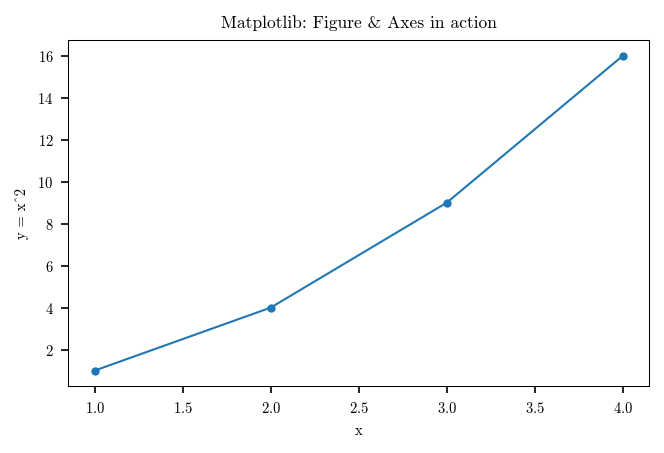

In [4]:
# Minimal Matplotlib example
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, y, marker='o')
ax.set_title("Matplotlib: Figure & Axes in action")
ax.set_xlabel("x")
ax.set_ylabel("y = x^2")
plt.show()


## Example: Create a Figure with (a Grid of) Multiple Axes using `fig, axes = plt.subplots(num_rows, num_cols)`

<img src="https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png" width="50%">

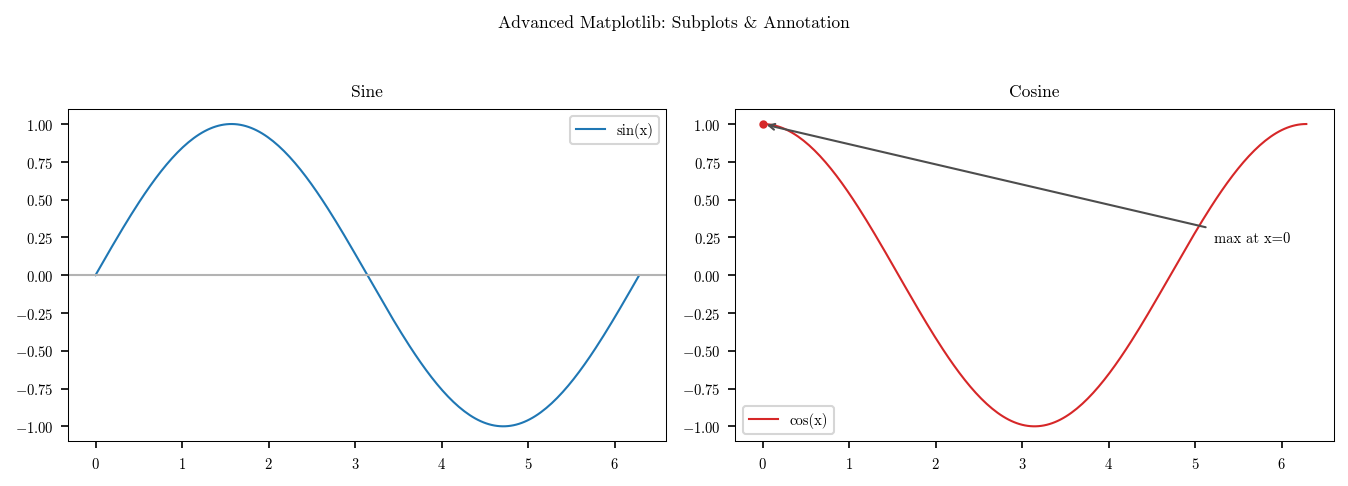

In [5]:
# Advanced Matplotlib demo: subplots and annotations
x = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize=(9, 3))
axes[0].plot(x, y1, color="#1f77b4", label="sin(x)")
axes[0].axhline(0, color="0.7", lw=1)
axes[0].set_title("Sine")
axes[0].legend()

axes[1].plot(x, y2, color="#d62728", label="cos(x)")
axes[1].set_title("Cosine")
axes[1].legend()

# Annotate a notable point on the cosine curve
max_x = 0
max_y = np.cos(max_x)
axes[1].scatter([max_x], [max_y], color="#d62728")
axes[1].annotate(
    "max at x=0",
    xy=(max_x, max_y), xytext=(0.8, 0.6), textcoords="axes fraction",
    arrowprops=dict(arrowstyle="->", color="0.3"), ha="left"
)

fig.suptitle("Advanced Matplotlib: Subplots & Annotation", y=1.05)
fig.tight_layout()
plt.show()


# Save the Figure
- After plotting, you can save the **figure** (not individual axes!) to a file.
- If you want to save an individual sub-plot (ax), just create a figure with `nrows=ncols=1` and save that figure.
- Matplotlib supports various file formats, including PNG, PDF, SVG, etc.
- You can choose a compressed format (e.g., JPG) for faster loading in web pages or sharing with others.
- But do choose a high-resolution format (e.g., PDF, SVG) for publication-quality figures.

In [6]:
# Save as PNG (raster format)
# fig.savefig("./my_plot.png", dpi=300, bbox_inches="tight")

# Save as PDF (vector format, good for publications)
# fig.savefig("./my_plot.pdf", bbox_inches="tight")

# Save as SVG (vector format, good for web)
# fig.savefig("./my_plot.svg", bbox_inches="tight")

# Seaborn: Dataset-oriented Plotting

- Seaborn lets you pass a **DataFrame** and refer to columns by name (e.g., `x="colname"`).  
- The plotting pipeline:
    1. Use `fig, axes = plt.subplots()` to create a figure and a set of subplots.
    2. Feed a `(dataset, ax)` pair to the Seaborn plotting function (e.g., `sns.histplot`, `sns.scatterplot`, etc.), it will plot the data on the `ax` object you provided.
    3. Save the `fig` object to an image file (e.g., `fig.savefig("my_plot.png")`) after finishing.

## Relationship to `matplotlib` (from Seaborn's documentation)
Seaborn’s integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.

While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.

Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn’s high-level interface and matplotlib’s deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a publication quality final product.

## Demo Dataset: `tips`: the Tipping data (https://rdrr.io/cran/reshape2/man/tips.html)

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected several variables:

- tip in dollars,
- bill in dollars,
- sex of the bill payer,
- whether there were smokers in the party,
- day of the week,
- time of day,
- size of the party.

In [7]:
# we use the tips dataset from seaborn
df_tips = sns.load_dataset("tips")
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Recall what we did in the previous lecture: create the "tip percentage" column

In [8]:
df_tips["tip_percentage"] = df_tips["tip"] / df_tips["total_bill"] * 100
df_tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
...,...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426
243,18.78,3.00,Female,No,Thur,Dinner,2,15.974441


# Part One: Single Variable Distributions

We begin with the most basic visualization for a single discrete variable. For single discrete variables, we would choose the pie-chart, but it is not available through seaborn. We would need to use the native `matplotlib` functionality to achieve it.

In [9]:
# or even simpler, we can use the `value_counts` method to get the counts of each category.
df_tips["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

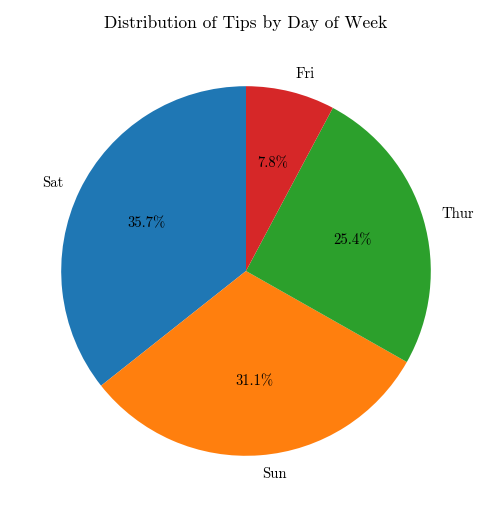

In [10]:
# Pie chart for the 'day' categorical variable
day_counts = df_tips["day"].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Distribution of Tips by Day of Week")
plt.show()

## Histogram for Single Continuous Variable with `sns.histplot(...)`

Common kwargs (frequent):
- **data**: DataFrame or array-like; **x**/**y**: column names or arrays
- **bins**: int or sequence; or use **binwidth** and **binrange** for control
- **stat**: "count" | "proportion" | "percent" | "density" (y-axis meaning)
- **discrete**: True if values are discrete (e.g., integers)
- **element**: "bars" | "step" | "poly" (hist visual style); **fill**: True/False
- **hue**: column for grouping; with **palette**, **hue_order**, **hue_norm**
- **multiple**: "layer" | "stack" | "dodge" | "fill" (how groups combine)
- **common_bins**/**common_norm**: align bins and normalization across hue levels
- **kde**: True to overlay KDE; pass **kde_kws** for KDE styling
- **color** or Matplotlib kwargs (e.g., **alpha**, **linewidth**)
- **log_scale**: bool or (bool, bool) to log-scale x/y; **ax**: target Axes

Docs: [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

<Axes: xlabel='tip_percentage', ylabel='Count'>

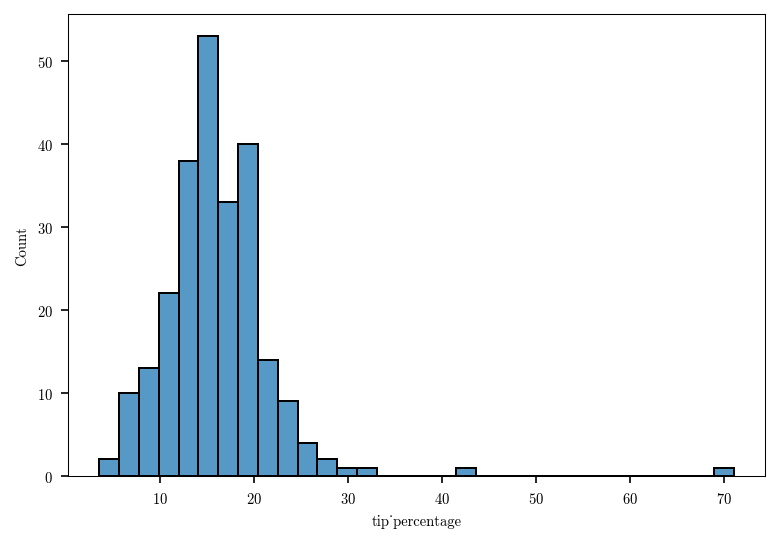

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", ax=ax)

## Fine-tune the histogram with `bins` and `kde`
- `bins` controls the width and number of bars.
- `kde` (kernel density estimation) fits a smooth line to the distribution (better for interpretation).

<Axes: xlabel='tip_percentage', ylabel='Count'>

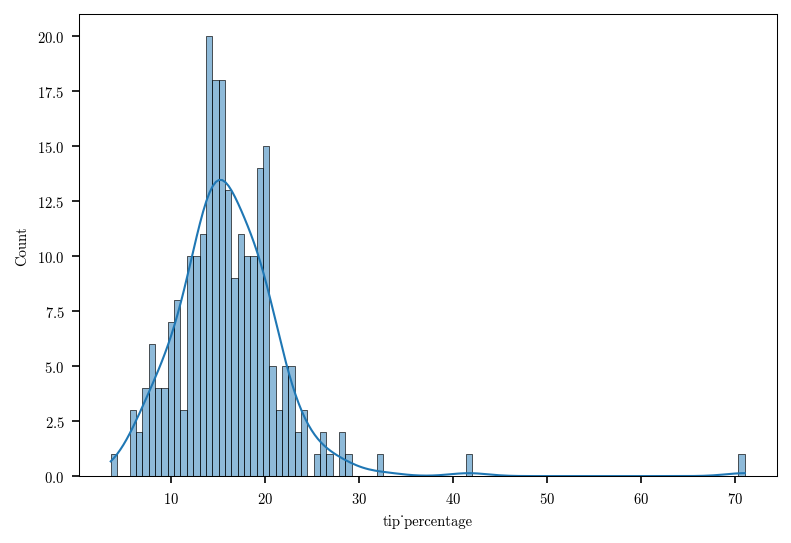

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, kde=True)

# Comparing histograms across different groups with the `hue` parameter
- With the `hue=<categorical_column>` parameter, you can compare the histograms across different groups (from different categories in the column).

<Axes: xlabel='tip_percentage', ylabel='Count'>

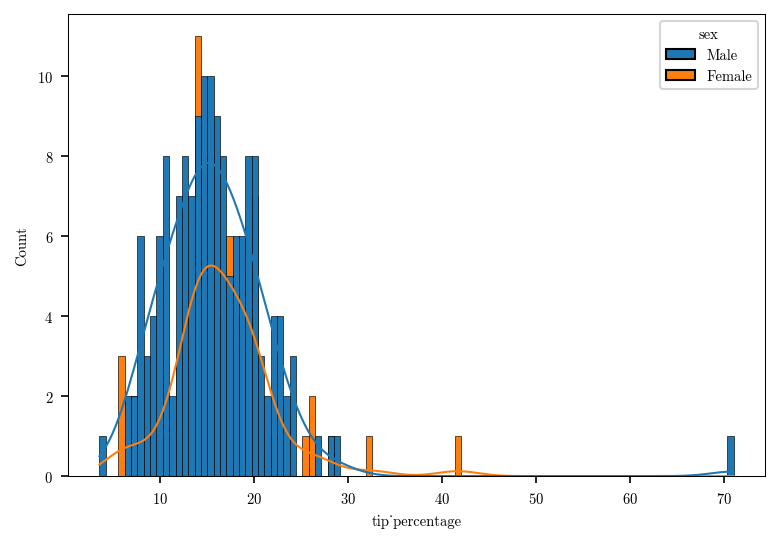

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="sex", alpha=1, kde=True)

## Fine-tuning the figure with the `alpha` (transparency) parameter
- `alpha` ranges from 0 (transparent) to 1 (opaque), and controls the transparency of the bars and kde lines.
- Helpful for visualizing multiple overlapping distributions.

<Axes: xlabel='tip_percentage', ylabel='Count'>

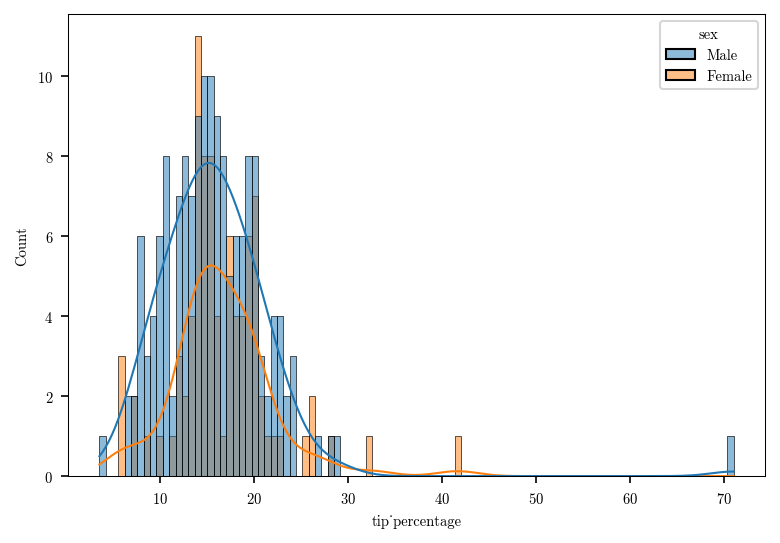

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="sex", alpha=0.5, kde=True)

## Fine-tuning the figure with the `set_xlim` and `set_ylim` parameters on the `ax` object
- `ax.set_xlim(min_x, max_x)` and `ax.set_ylim(min_y, max_y)` are used to set the limits of the x and y axes.
- Helpful to zoom in on a specific range of the data.

(0.0, 30.0)

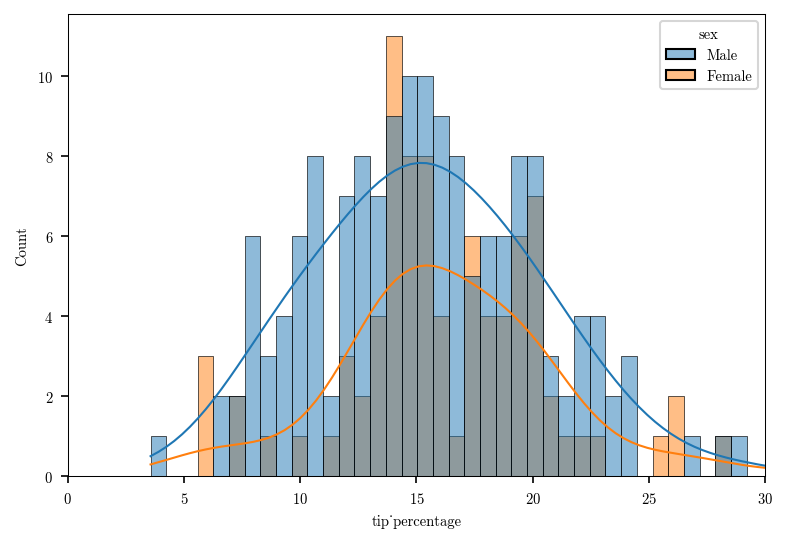

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="sex", alpha=0.5, kde=True)
ax.set_xlim(0, 30)

### Change to log-scale using `ax.set_xscale("log")` and `ax.set_yscale("log")`.

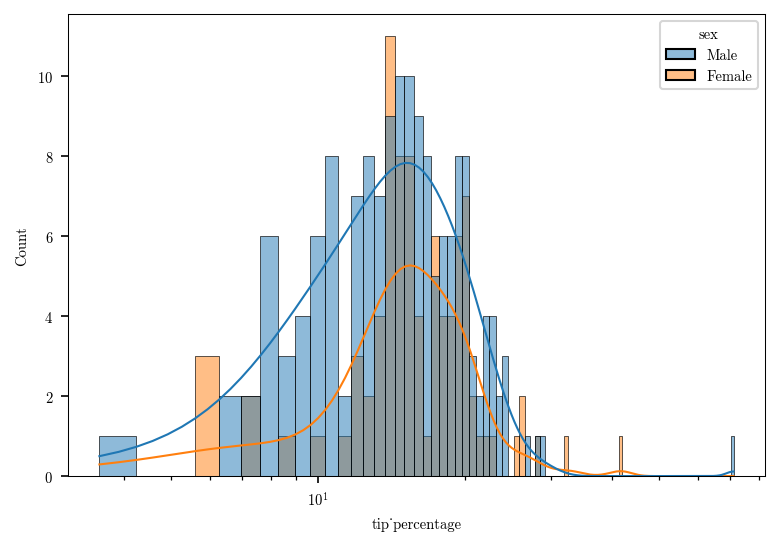

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))  # single axis.
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="sex", alpha=0.5, kde=True)
ax.set_xscale("log")

## Putting several histograms on different `ax` within the same `fig`.

Text(0.5, 0.01, 'Tip Percentage by Different Categories')

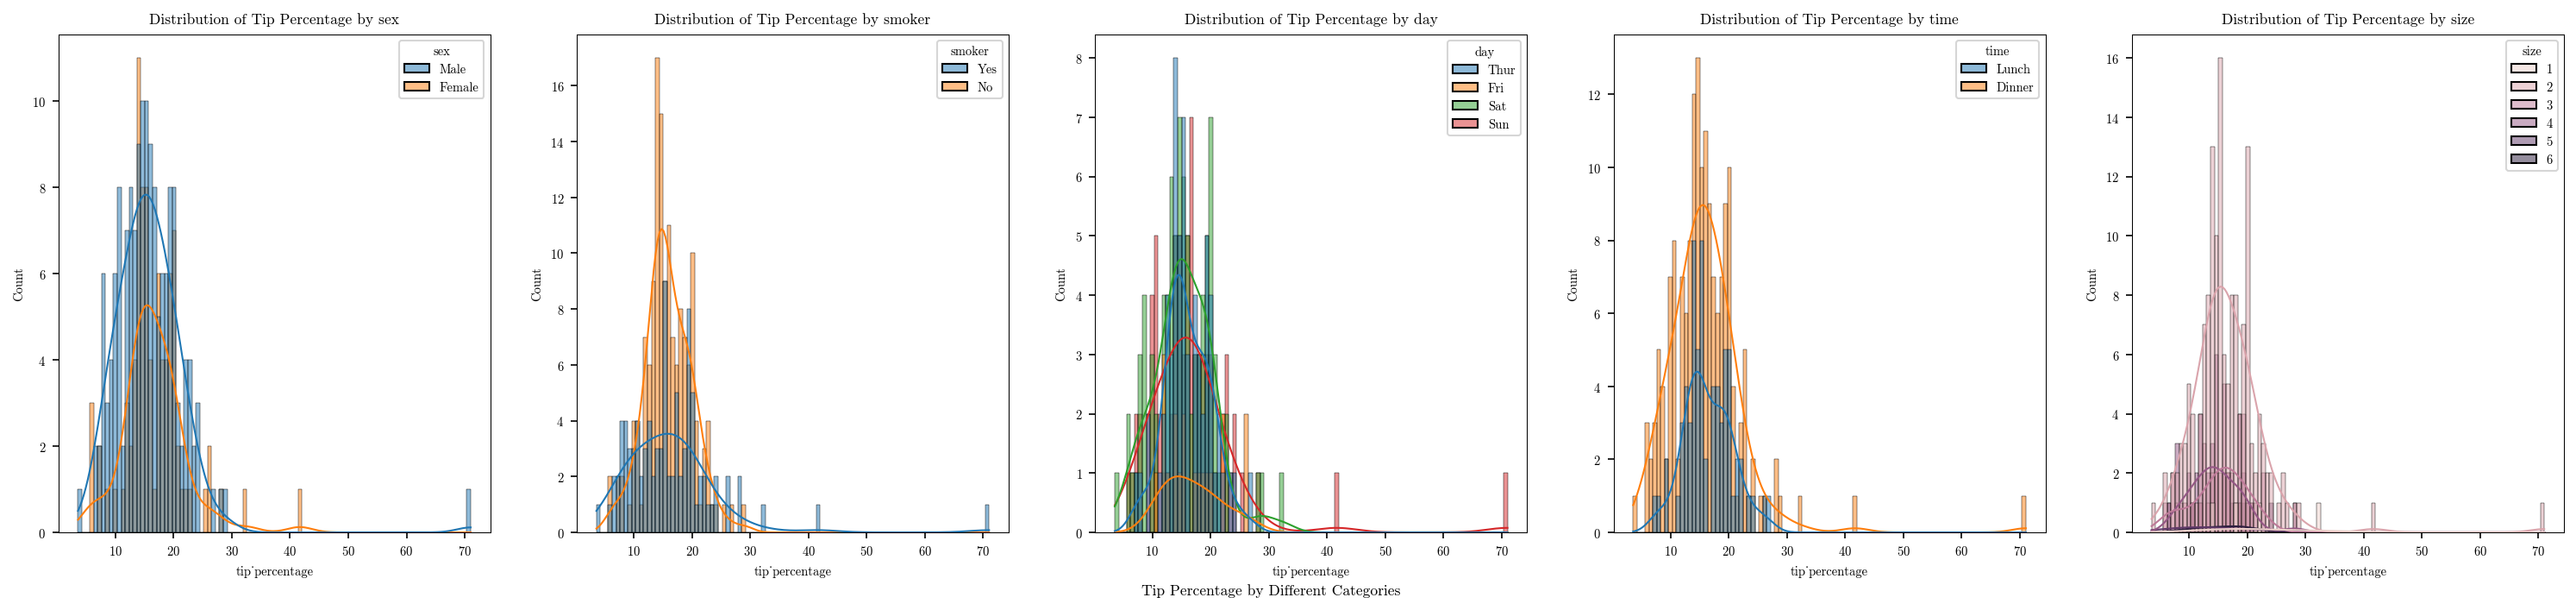

In [17]:
categorical_columns = ["sex", "smoker", "day", "time", "size"]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(5*len(categorical_columns), 5))
for i in range(len(categorical_columns)):
    sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=axes[i], hue=categorical_columns[i], alpha=0.5, kde=True)
    # set the axis labels
    axes[i].set_title(f"Distribution of Tip Percentage by {categorical_columns[i]}")
fig.supxlabel("Tip Percentage by Different Categories")

# Part Two: Exploring the Relationship between Two Variables.

## One Continuous and One Categorical Variable Categorical Comparison

- Main idea:
    - We wish to see how the distribution of variable `x` differs across levels of another categorical variable.
    - we want to first group the dataset by the categorical variable.
    - Plot the distribution of `x` for each data split.
    - Compare them.


#### What we did with histogram + hue was fine.

<Axes: xlabel='tip_percentage', ylabel='Count'>

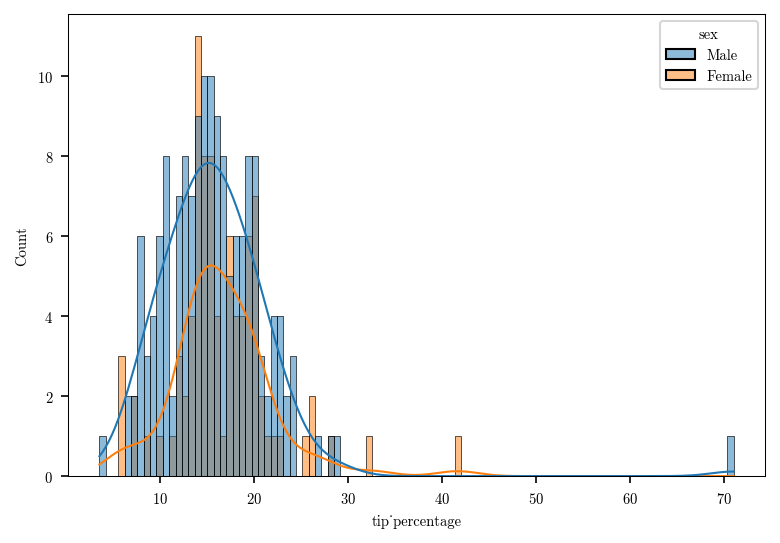

In [18]:
# using hue could be messy, especially when you have to print it / have multiple hue levels.
fig, ax = plt.subplots(figsize=(6, 4))
# This is fine....
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="sex", alpha=0.5, kde=True)

#### But it becomes less readable when (1) printed on grayscale paper and (2) the number of categories grows.

<Axes: xlabel='tip_percentage', ylabel='Count'>

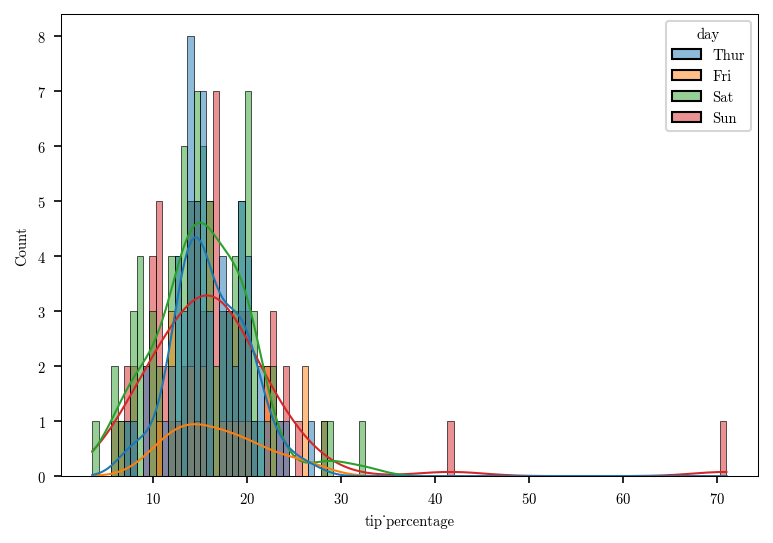

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="day", alpha=0.5, kde=True)

<Axes: xlabel='tip_percentage', ylabel='Count'>

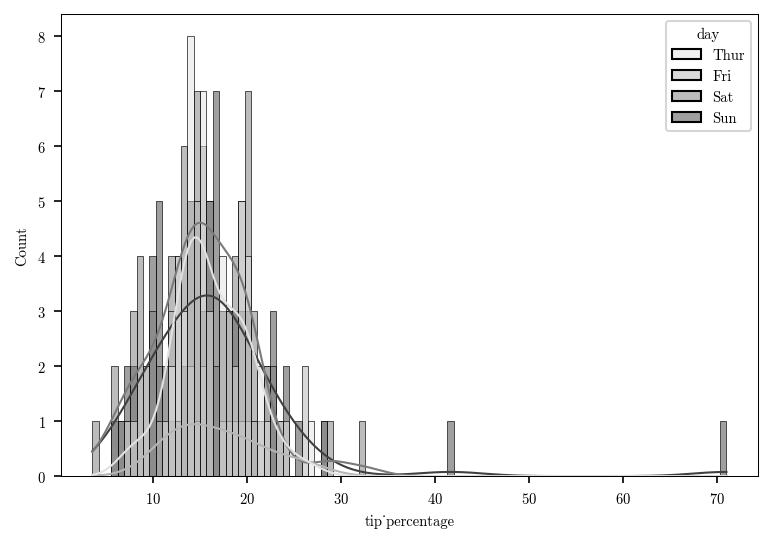

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df_tips, x="tip_percentage", bins=100, ax=ax, hue="day", alpha=0.5, kde=True, palette="Greys")

## Compare distributions across categories (median, quartiles, whiskers, outliers) with `sns.boxplot` and `sns.violinplot`

### Quick API Guide (Box/Violin used below)

- **sns.boxplot(data=None, x=None, y=None, hue=None, order=None, dodge=True, whis=1.5, showfliers=True, palette=None, width=0.8)**
  - **data**: DataFrame to plot
  - **x/y**: Column names for categorical and continuous variables
  - **hue**: Column name to split data into different colored groups
  - **order**: List specifying the order of categorical levels
  - **whis**: Proportion of IQR past quartiles to extend whiskers (default 1.5)
  - **showfliers**: Whether to show outlier points beyond whiskers
  - **dodge**: When using hue, whether to separate boxes side-by-side
  - **width**: Width of boxes (0-1 scale)
  - **palette**: Color palette for different categories

- **sns.violinplot(data=None, x=None, y=None, hue=None, split=False, inner='box', bw_method='scott', cut=2, scale='area', dodge=True, palette=None)**
  - **data**: DataFrame to plot
  - **x/y**: Column names for categorical and continuous variables
  - **hue**: Column name to split data into different colored groups
  - **split**: When True with 2-level hue, draws half-violins on each side
  - **inner**: Representation of data inside violin ('box', 'quartile', 'point', 'stick', or None)
  - **bw_method**: Method for calculating kernel density bandwidth ('scott', 'silverman', or float)
  - **cut**: Distance past extreme data points to extend density curve (in bandwidths)
  - **scale**: Method to scale violin width ('area', 'count', or 'width')
  - **dodge**: When using hue, whether to separate violins side-by-side
  - **palette**: Color palette for different categories

<Axes: xlabel='day', ylabel='tip_percentage'>

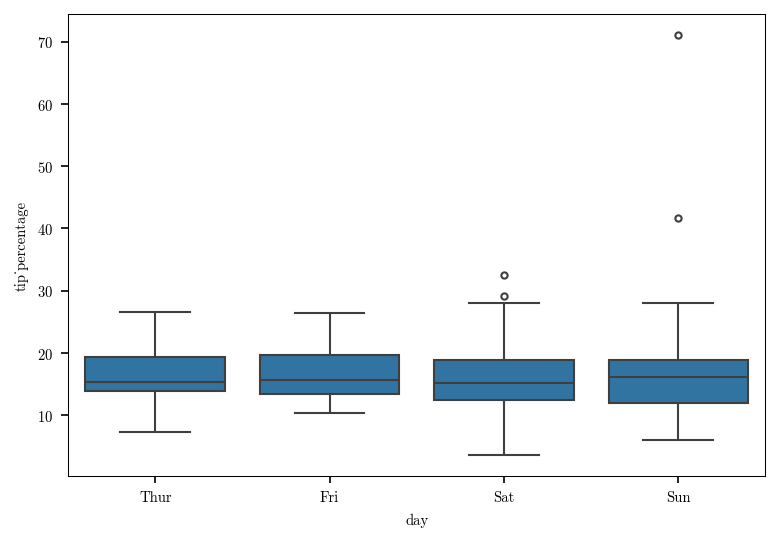

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df_tips, x="day", y="tip_percentage", ax=ax)

### How to read a boxplot?
- The box represents the interquartile range (IQR) — the middle 50% of the data (25% to 75%-percentile).
- The line in the box represents the median (50%-percentile).
- The whiskers represent the range of the data from 1.5 IQR to the minimum or maximum of the data.
- Individual circles represent outliers — data points that lie beyond 1.5×IQR from the box.

### Remove the outliers with `showfliers=False`

<Axes: xlabel='day', ylabel='tip_percentage'>

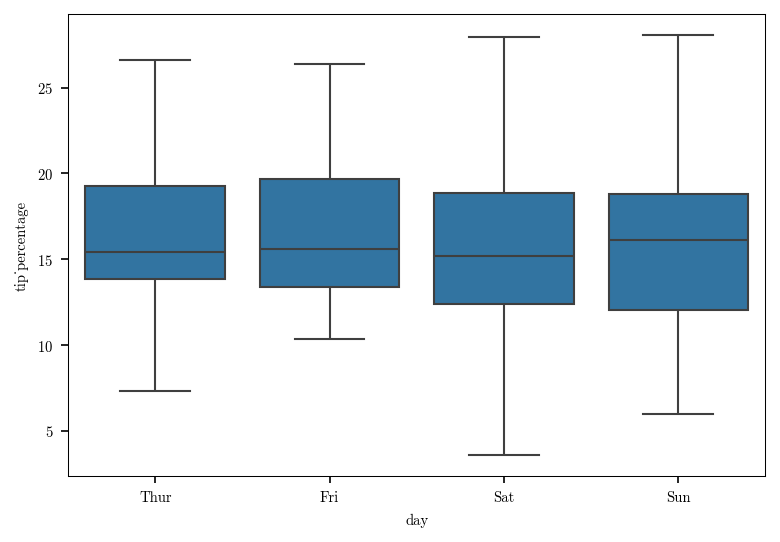

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df_tips, x="day", y="tip_percentage", showfliers=False, ax=ax)

#### Take-away: the boxplot shows a few important summary statistics of the distribution of the data on the splits corresponding to each category.

## The Violin Plot
- The violin plot is a combination of the boxplot and the kernel density estimation.
- It shows the distribution of the data on the splits corresponding to each category.
- It is more informative than the boxplot but more complex to read than the boxplot.

<Axes: xlabel='day', ylabel='tip_percentage'>

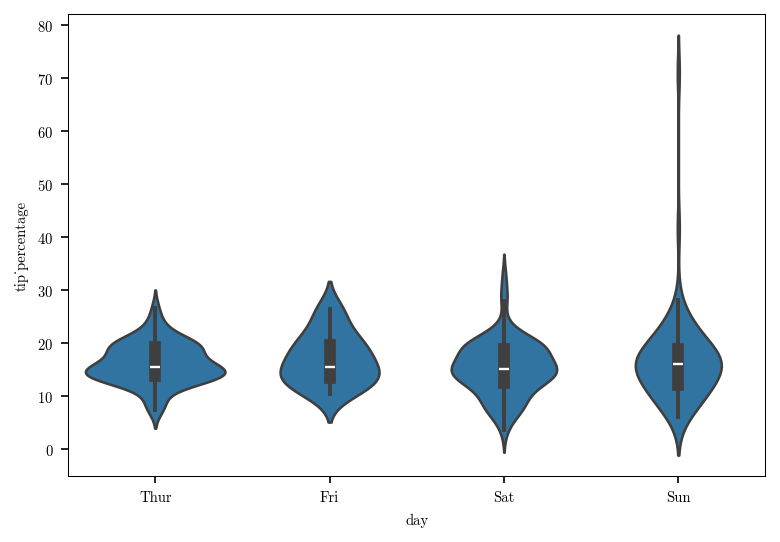

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(data=df_tips, x="day", y="tip_percentage", ax=ax)

## Exploring the Relationship between Two Continuous Variables

## Relationship: `sns.scatterplot`
Visualize the relationship between two numeric variables. Add `hue` (and optionally `style`) for a categorical split.


- **sns.scatterplot(data=None, x=None, y=None, hue=None, style=None, size=None, sizes=None, alpha=None, palette=None, ax=None)**
  - **data**: DataFrame containing the data to plot
  - **x, y**: column names for the x-axis and y-axis variables
  - **hue**: column name to color points by category (adds a legend)
  - **style**: column name to vary marker shapes by category
  - **size**: column name to scale point sizes by a numeric variable
  - **sizes**: tuple (min_size, max_size) to control the range of point sizes
  - **alpha**: transparency level (0.0 to 1.0); useful for handling overplotting
  - **palette**: color scheme (e.g., 'viridis', 'Set2', or custom list)
  - **ax**: matplotlib Axes object to draw the plot onto (for subplots)
  - Docs: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


## The basic scatter plot with `sns.scatterplot`

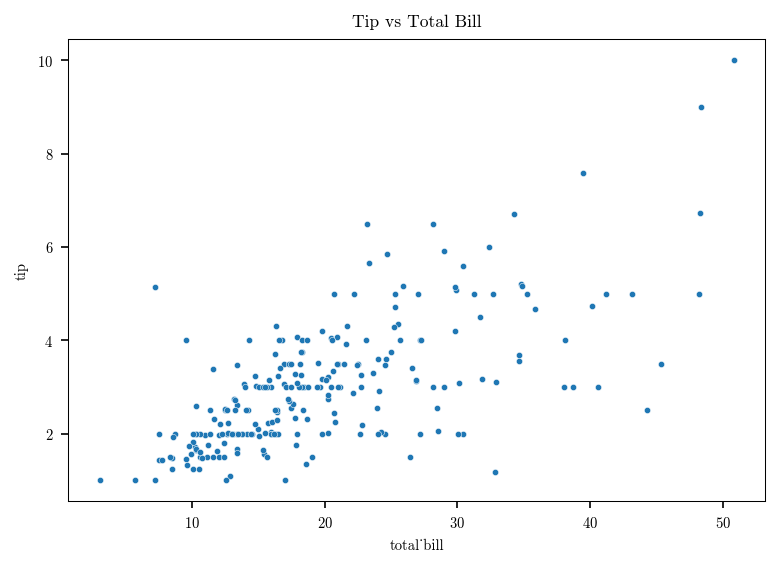

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_tips, x="total_bill", y="tip")
plt.title("Tip vs Total Bill")
plt.show()

## Add grouping with `hue` (color dots by category)

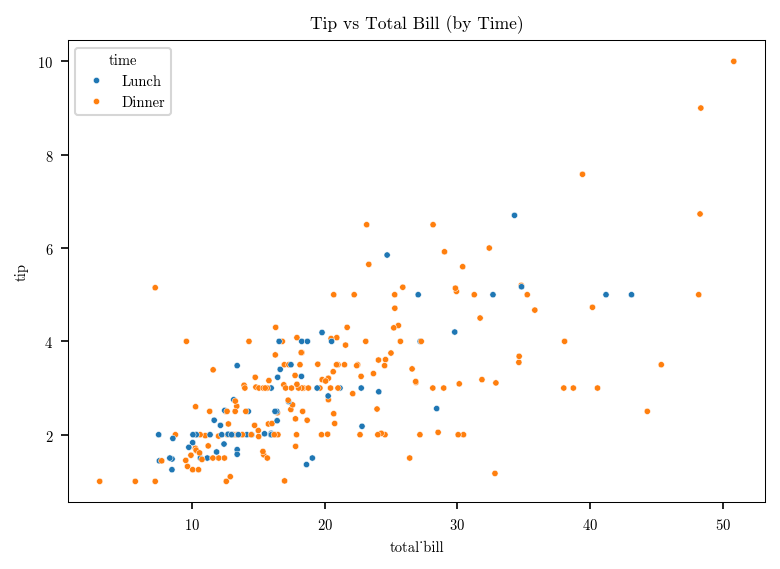

In [25]:
# Tips: total_bill vs tip colored by time
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_tips, x="total_bill", y="tip", hue="time")
plt.title("Tip vs Total Bill (by Time)")
plt.show()

## There are several ways to change points in the scatter plot to reflect the grouping, such as with `style` (change marker shapes by category)

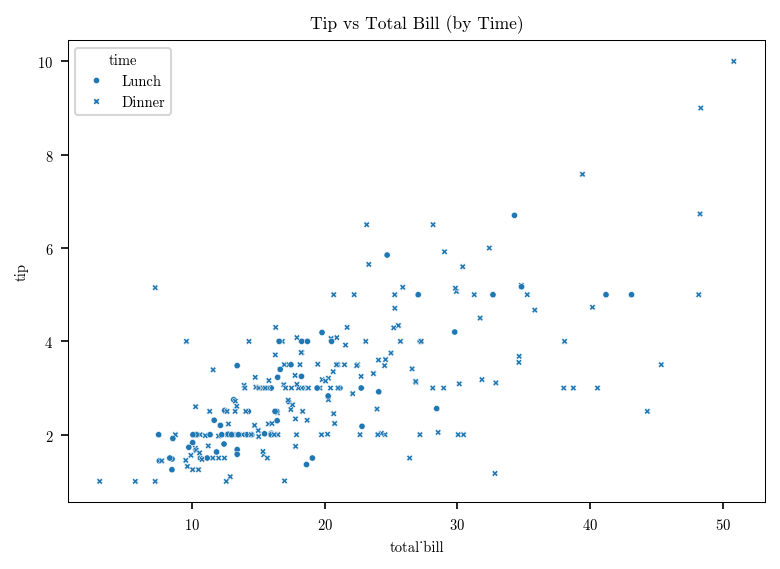

In [26]:
# Tips: total_bill vs tip colored by time
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_tips, x="total_bill", y="tip", style="time")
plt.title("Tip vs Total Bill (by Time)")
plt.show()

### You can also combine them to make the distinction more clear.

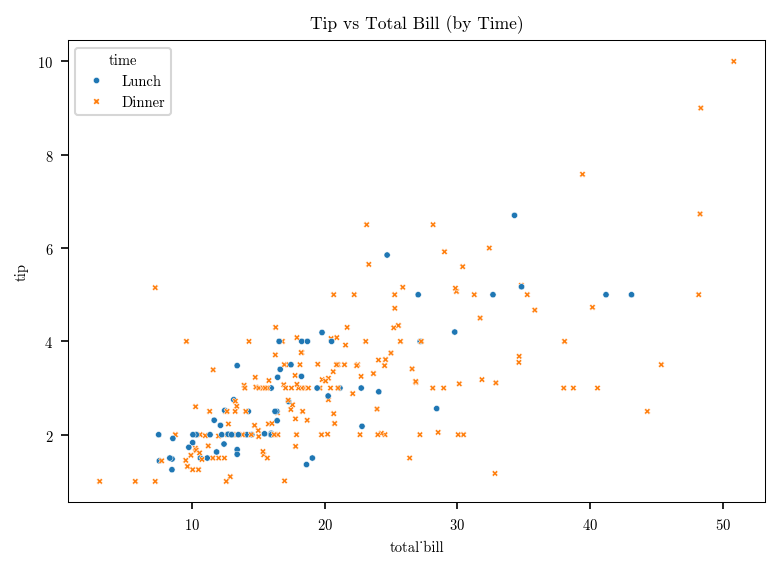

In [27]:
# Tips: total_bill vs tip colored by time
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_tips, x="total_bill", y="tip", style="time", hue="time")
plt.title("Tip vs Total Bill (by Time)")
plt.show()

## If the categorical variable has some sort of order (e.g., the party `size`), we can use `order` to specify the order of the categories.

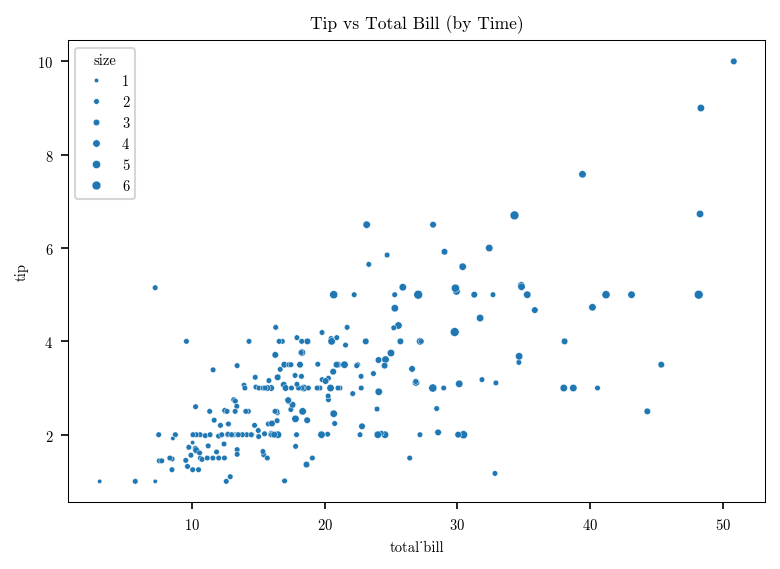

In [28]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_tips, x="total_bill", y="tip", size="size")
plt.title("Tip vs Total Bill (by Time)")
plt.show()

## Recommendation: while producing figures for publication, prefer `style` and `size` over `hue` because there is a high chance that your readers are printing the paper in grayscale.

# Make it Fancier with `sns.jointplot`, showing the distributions of single variables as well.
- There are two different types of plotting functions in `seaborn`.
- The more basic ones like `scatterplot` are **ax-level** functions, where you feed the `ax` object to the function and the function will plot on the `ax` object.
- The other ones are **figure-level** functions, which are more complex and will create the `fig` and `ax` objects for you internally (because it is more complex and needs to access both pieces of information).
- This does not matter too much, just check the API document.

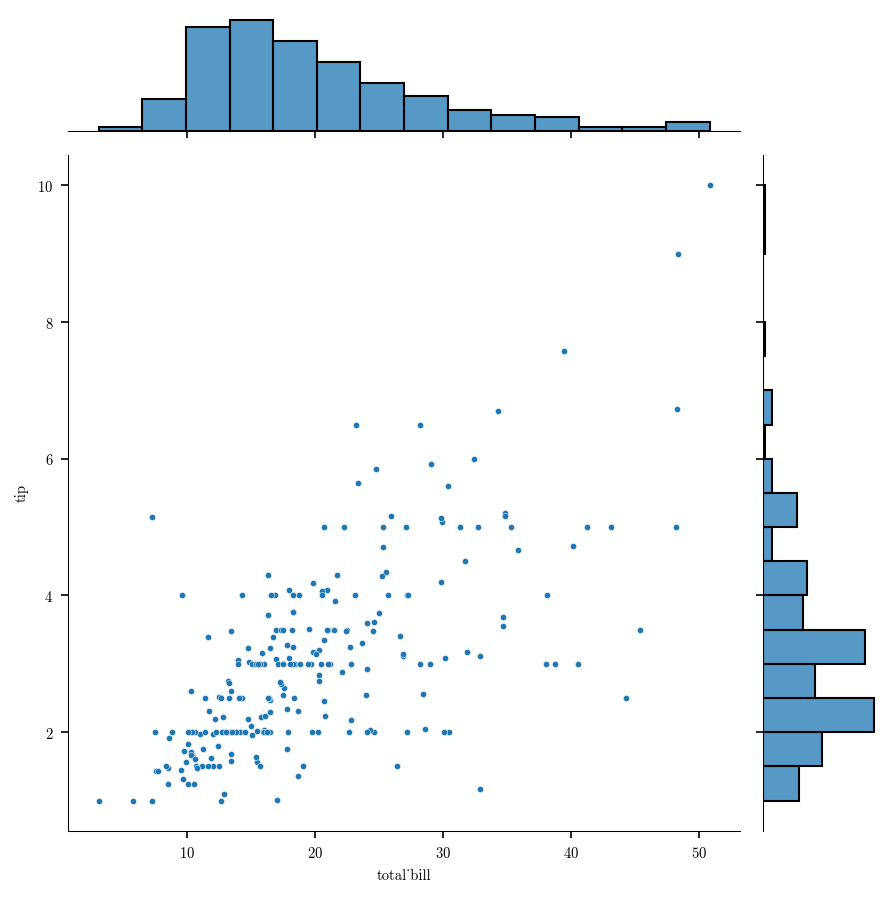

In [29]:
sns.jointplot(data=df_tips, x="total_bill", y="tip")

## Add the KDE estimation and hue

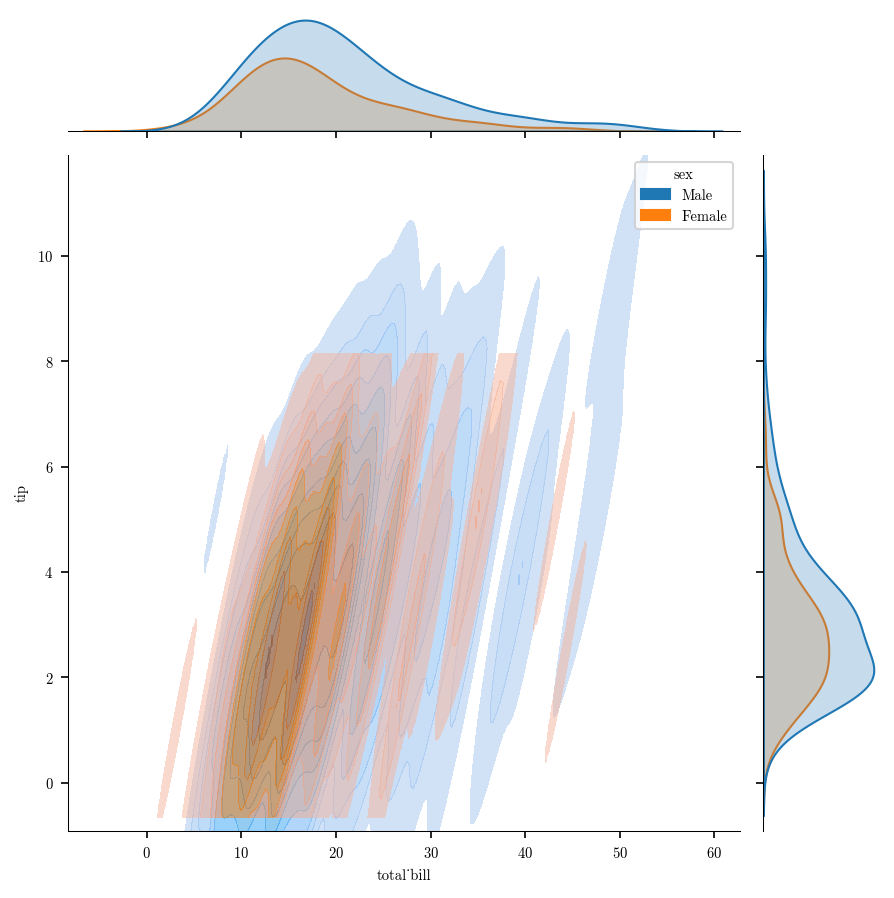

In [30]:
sns.jointplot(data=df_tips, x="total_bill", y="tip", hue="sex", kind="kde", fill=True, alpha=0.5)

### Quick API Guide (Pairplot used below)

- **sns.pairplot(data, vars=None, hue=None, corner=False, diag_kind='auto', kind='scatter', height=2.5, aspect=1.0, plot_kws=None, diag_kws=None)**
  - **vars**: subset numeric columns; **hue**: color by category; **corner**: lower triangle only
  - **diag_kind**: 'kde' or 'hist'; **kind**: off-diagonal plot type; **height/aspect**: sizing


# Exploring the Correlation between Any Pair of Two Continuous Variables with the `sns.pairplot`

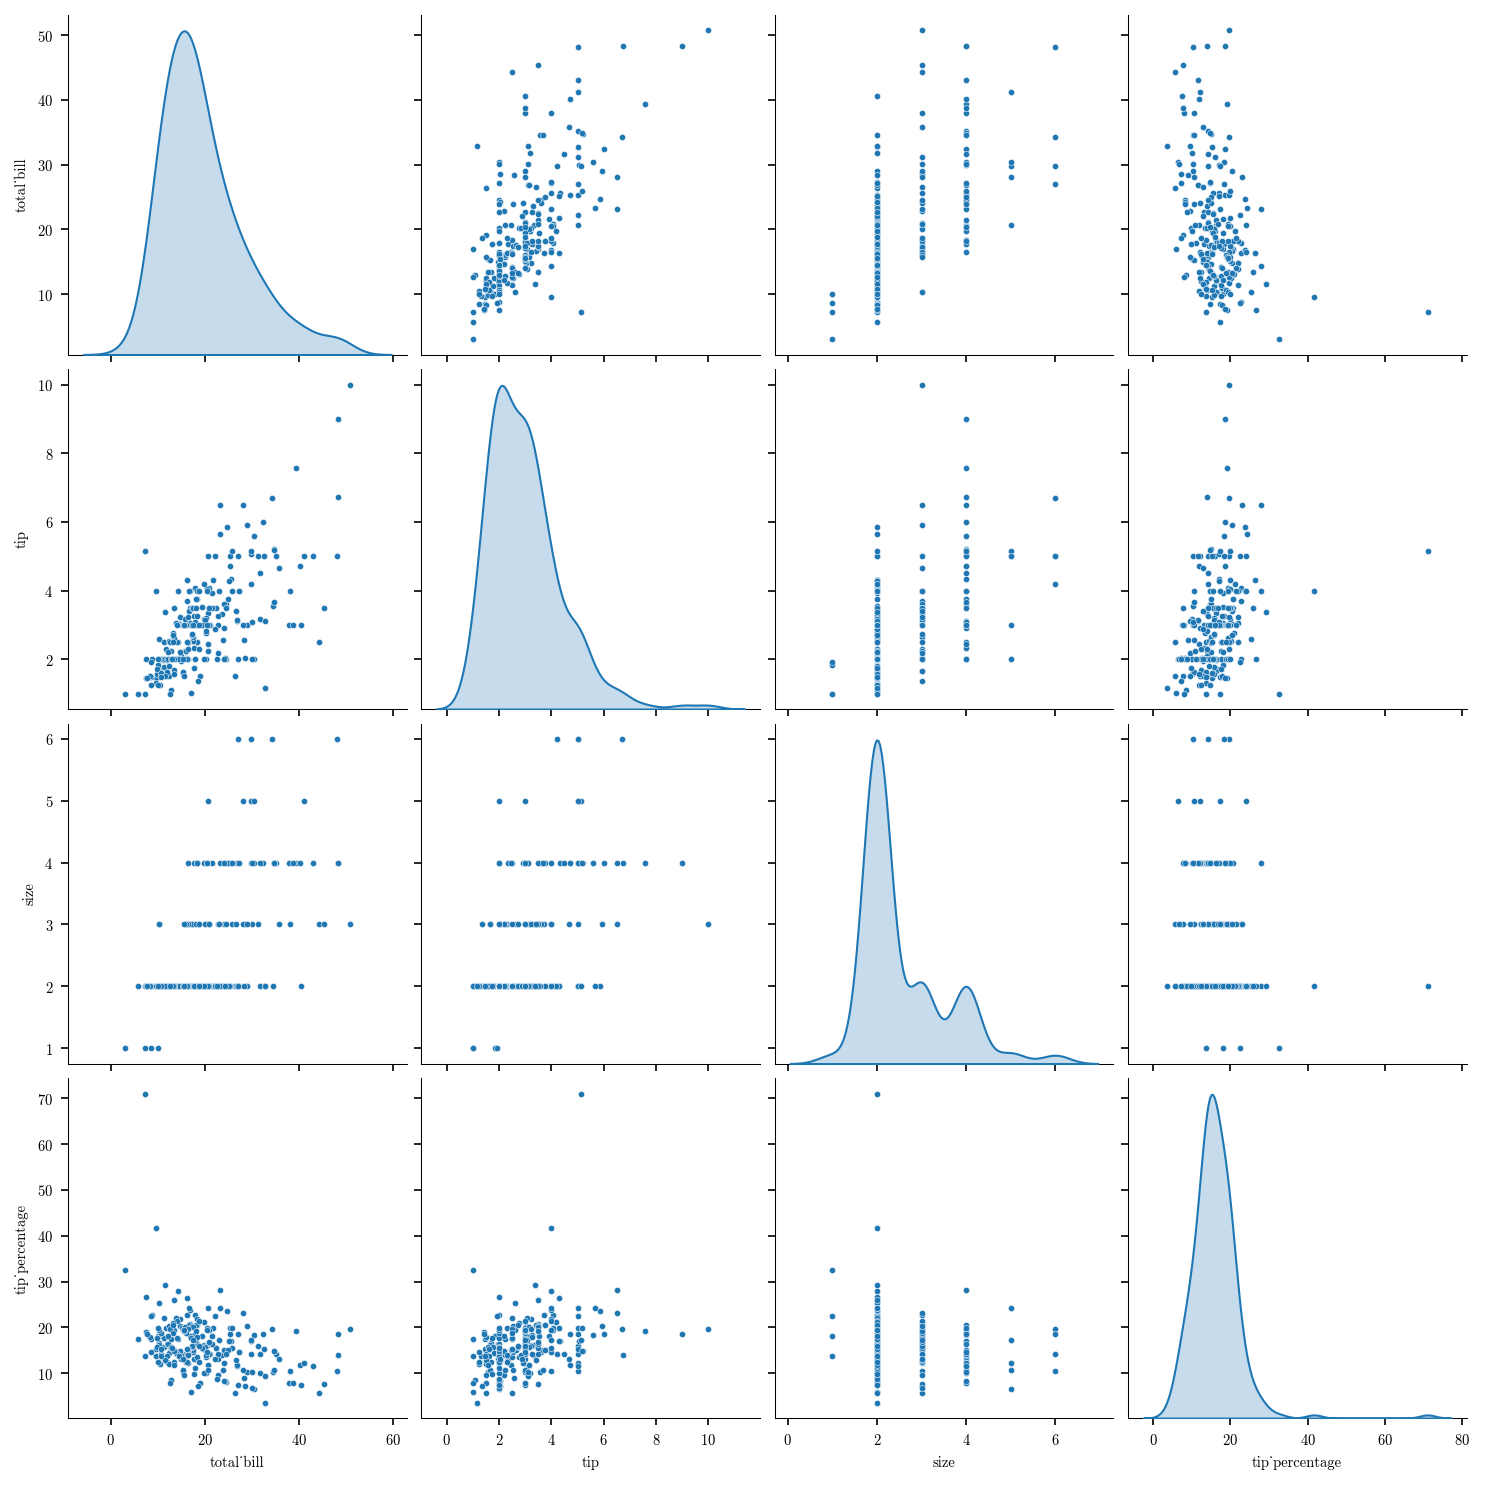

In [31]:
sns.pairplot(data=df_tips, diag_kind="kde", height=2.5)

## Visualizing Variable Correlation with `sns.heatmap`
- `sns.heatmap(data, annot=True, cmap='coolwarm', vmin=None, vmax=None, center=None, fmt='.2f', linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`
  - **annot**: show data values; **cmap**: color map; **vmin/vmax**: color scale limits
  - **center**: color midpoint; **fmt**: format string for annotations
  - **linewidths**: width of lines between cells; **linecolor**: color of lines
  - **cbar**: show color bar; **cbar_kws**: color bar kwargs
  - **cbar_ax**: color bar axis; **square**: make cells square
  - **xticklabels/yticklabels**: show/hide tick labels

In [32]:
df_tips["sex_female"] = (df_tips["sex"] == "Female").astype(int)
df_tips["is_smoker"] = (df_tips["smoker"] == "Yes").astype(int)

In [33]:
corr_matrix = df_tips[["total_bill", "tip", "sex_female", "is_smoker", "size", "tip_percentage"]].corr()
corr_matrix

,total_bill,tip,sex_female,is_smoker,size,tip_percentage
total_bill,1.000000,0.675734,-0.144877,0.085721,0.598315,-0.338624
tip,0.675734,1.000000,-0.088862,0.005929,0.489299,0.342370
sex_female,-0.144877,-0.088862,1.000000,-0.002816,-0.086195,0.069475
is_smoker,0.085721,0.005929,-0.002816,1.000000,-0.133178,0.030820
size,0.598315,0.489299,-0.086195,-0.133178,1.000000,-0.142860
tip_percentage,-0.338624,0.342370,0.069475,0.030820,-0.142860,1.000000


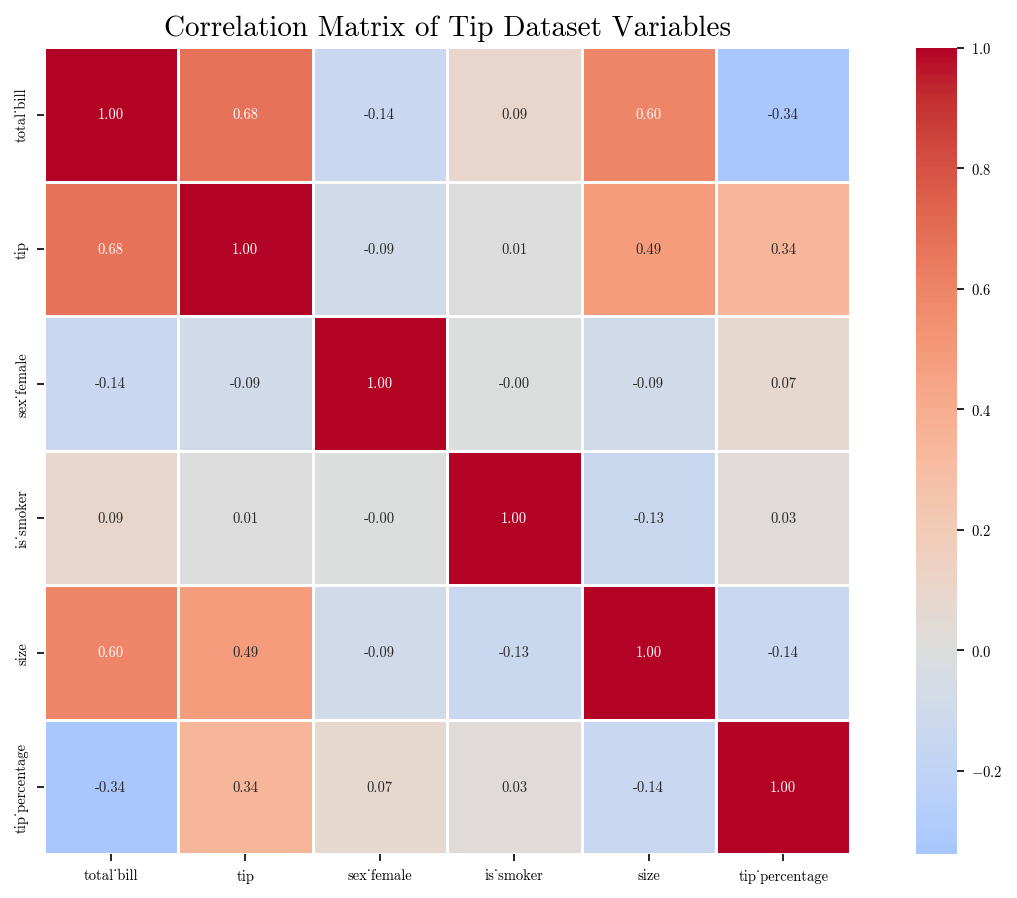

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5, linecolor='white', square=True, ax=ax)
ax.set_title("Correlation Matrix of Tip Dataset Variables", fontsize=14, fontweight='bold')
plt.tight_layout()

## Let's now introduce some modelling (e.g., OLS) with the `sns.regplot` (ax-level function)

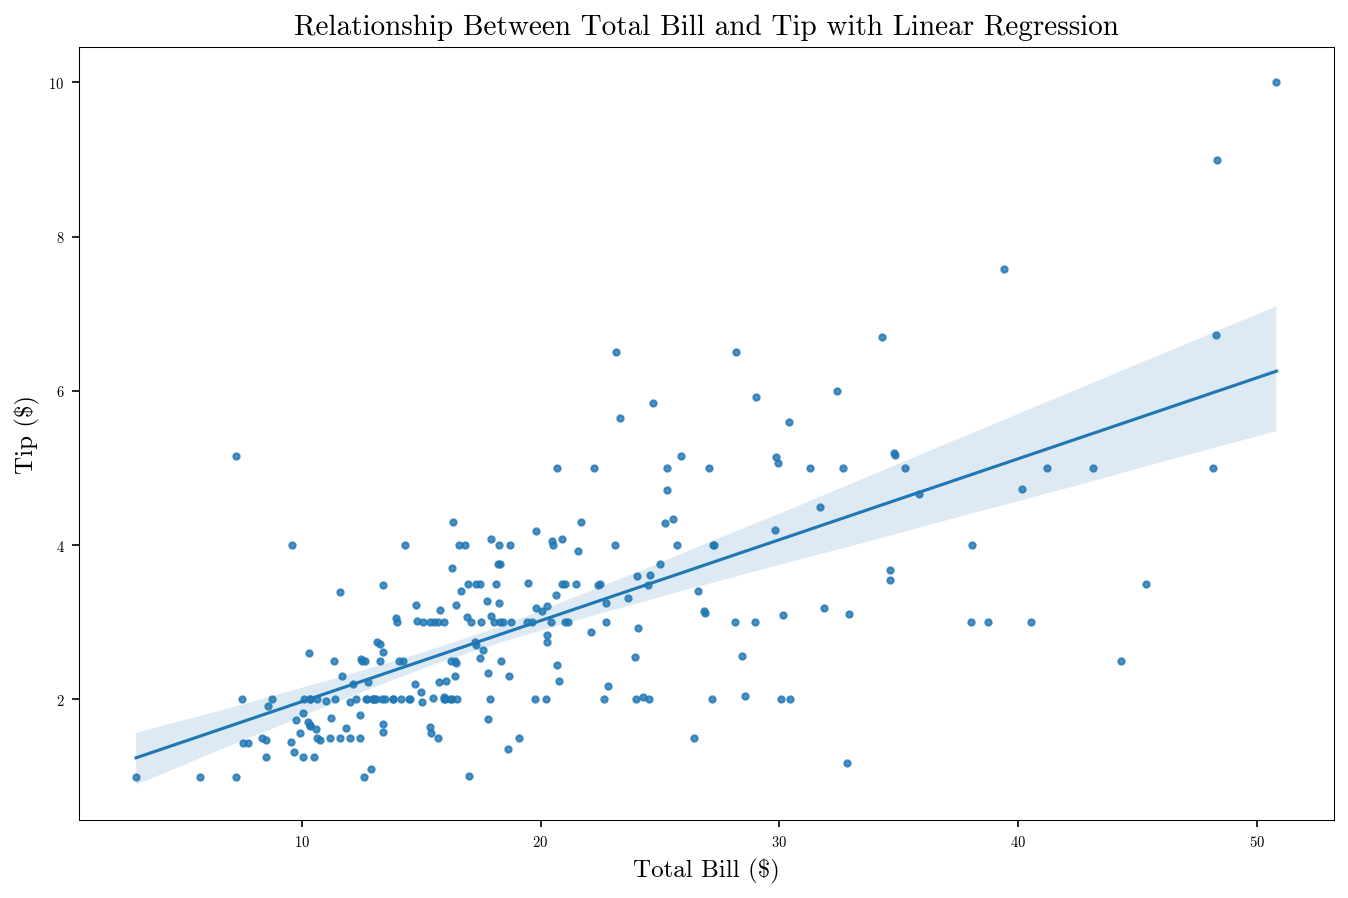

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(data=df_tips, x="total_bill", y="tip", ax=ax)
ax.set_title("Relationship Between Total Bill and Tip with Linear Regression", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Bill ($)", fontsize=12)
ax.set_ylabel("Tip ($)", fontsize=12)
plt.tight_layout()

## `sns.lmplot` is a figure-level function that is more complex and will create the `fig` and `ax` objects for you internally.

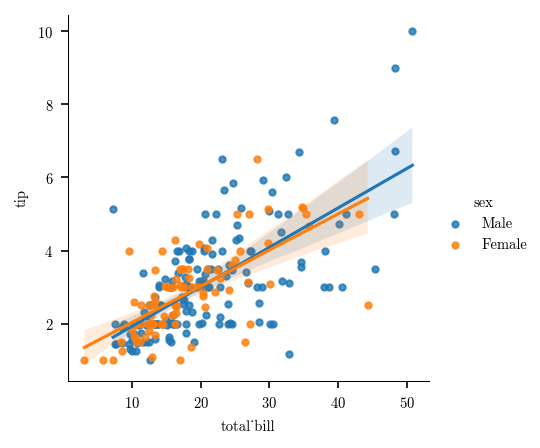

In [36]:
sns.lmplot(data=df_tips, x="total_bill", y="tip", hue="sex", height=3, aspect=1)

## Figure-level functions are capable of doing much more complex things, like plotting data from different categories in different subplots (we did this before).

### Use the `col` parameter to specify the categorical variable to split the data into different subplots.

### Quick API Guide (lmplot used below)
 
 - **sns.lmplot(data, x=None, y=None, hue=None, col=None, row=None, height=3, aspect=1, scatter_kws=None, line_kws=None, ci=95, order=1)**
   - **hue**: color by category; **col/row**: facet by categorical variable
   - **height/aspect**: control subplot size; **scatter_kws/line_kws**: styling dictionaries
   - **ci**: confidence interval (95 default); **order**: polynomial degree for regression



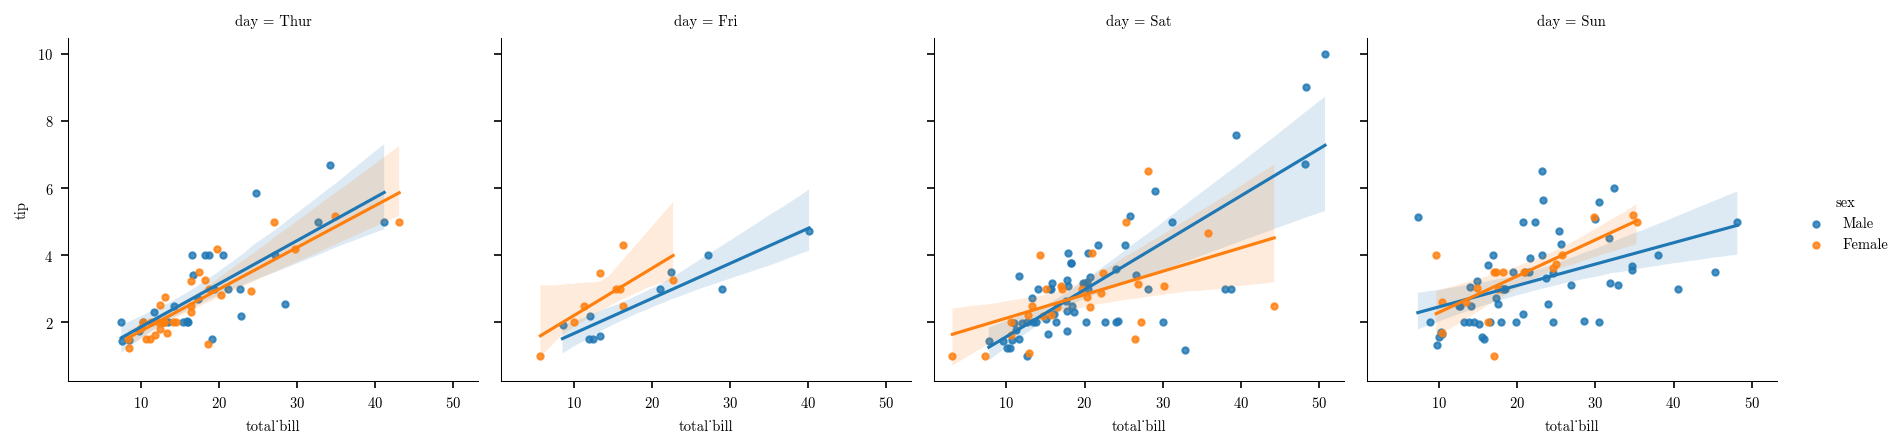

In [37]:
sns.lmplot(data=df_tips, x="total_bill", y="tip", hue="sex", col="day", height=3, aspect=1)

## Exporting Figures for reports and papers (1–2 minutes)
- Use `plt.savefig("figure.png", dpi=300, bbox_inches="tight")` for high-resolution PNG.
- Prefer vector formats (`.pdf`, `.svg`) for line art; keep text editable.
- Control size at creation: `plt.figure(figsize=(w, h))` or `plt.subplots(figsize=...)`.
- For Seaborn figure-level objects (`displot`, `catplot`, `lmplot`), save with `g.figure.savefig(...)`.
- Ensure consistent fonts/colors; set once via `sns.set_theme(...)` or Matplotlib rcParams.


# Take-away: (i) Don't pack too much information in a single plot! (ii) Don't rely on color too much.

# Attendance code is on the whiteboard, don't forget to submit it.

<img src="./images/CME193_Lecture_5_Attendance_Form.png" width="50%">

# Appendix: API Quick Reference (High-usage kwargs + official docs)

### Matplotlib
- **plt.subplots(nrows=1, ncols=1, figsize=None, dpi=None, sharex=False, sharey=False, constrained_layout=False, layout=None)**
  - **nrows / ncols**: grid shape (rows × cols)
  - **figsize**: canvas size in inches (width, height)
  - **dpi**: dots-per-inch, output resolution
  - **sharex / sharey**: share axis limits/scales across subplots
  - **constrained_layout/layout**: auto spacing engine for subplots
  - Returns **(fig, ax or axes)**
  - Docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- **Axes basics: set_title, set_xlabel, set_ylabel, set_xlim, set_ylim, legend**
  - Frequent:
    - **labelpad**: label–axis spacing
    - **loc**: legend location
    - **fontsize**: text size
    - **x/y limits**: visible range
  - Axes API: https://matplotlib.org/stable/api/axes_api.html
- **Figure/Axes save: plt.savefig / Figure.savefig(fname, dpi=None, bbox_inches=None, transparent=False, facecolor=None, edgecolor=None, format=None, metadata=None)**
  - **dpi**: output resolution; **bbox_inches='tight'** trims whitespace; **transparent=True** makes background transparent; **format** overrides by extension
  - Docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
- **Layout & style**
  - **plt.tight_layout()**: auto-adjust subplot padding to reduce overlap
  - **plt.style.use([...])**: apply one or more predefined style sheets
  - **matplotlib.ticker**: **StrMethodFormatter** (string-format ticks, e.g., currency), **PercentFormatter** (0–1 to %)
    Docs: https://matplotlib.org/stable/api/ticker_api.html

### Seaborn (dataset-oriented)
- **sns.load_dataset(name, cache=True)**
  - Loads example dataset by name; returns DataFrame
  - Docs: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
- **sns.histplot(data=None, x=None, y=None, bins=None, binwidth=None, binrange=None, discrete=False, stat='count', element='bars', fill=True, hue=None, multiple='layer', common_bins=True, common_norm=True, kde=False, color=None, alpha=None, ax=None, log_scale=False)**
  - Frequent:
    - **x/y**: column to plot
    - **bins/binwidth**: bin count or width
    - **binrange**: min/max for bins
    - **stat**: y-scaling ('count'/'density'/'percent')
    - **discrete**: treat values as integers
    - **element**: histogram style ('bars'/'step'/'poly')
    - **fill**: filled vs outline bars
    - **hue**: group by a categorical variable
    - **multiple**: combine groups ('layer'/'stack'/'dodge'/'fill')
    - **common_bins/common_norm**: align bin edges and normalization across hue
    - **kde**: overlay kernel density curve
    - **alpha**: bar transparency
    - **color**: single color override
    - **ax**: target Matplotlib Axes
    - **log_scale**: log-scale x and/or y
  - Docs: https://seaborn.pydata.org/generated/seaborn.histplot.html
- **sns.boxplot(data=None, x=None, y=None, hue=None, order=None, orient=None, width=0.8, dodge=True, showcaps=True, showfliers=True, whis=1.5, linewidth=None, fliersize=5, palette=None, ax=None)**
  - Frequent:
    - **x/y**: variable mapping
    - **hue**: split by category
    - **order**: order of categories
    - **orient**: 'h' for horizontal or 'v' for vertical
    - **whis**: whisker reach from IQR
    - **showfliers**: show/hide outliers
    - **palette**: colors for categories
    - **dodge**: separate hue levels side-by-side
    - **width**: box width
  - Docs: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- **sns.violinplot(data=None, x=None, y=None, hue=None, split=False, inner='box', bw_method='scott', cut=2, scale='area', linewidth=None, palette=None, ax=None, dodge=True)**
  - Frequent:
    - **inner**: draw stats inside ('box'/'quartile'/None)
    - **split**: split violins for two-level hue
    - **bw_method**: KDE bandwidth method
    - **cut**: extend density past min/max
    - **scale**: area/width scaling ('area'/'count'/'width')
    - **palette**: colors for categories
    - **dodge**: separate hue violins
  - Docs: https://seaborn.pydata.org/generated/seaborn.violinplot.html
- **sns.swarmplot(data=None, x=None, y=None, hue=None, dodge=False, size=5, alpha=None, palette=None, ax=None)**
  - Frequent:
    - **size**: marker size
    - **alpha**: point transparency
    - **dodge**: separate hue levels
    - **palette**: colors for categories
  - Docs: https://seaborn.pydata.org/generated/seaborn.swarmplot.html
- **sns.scatterplot(data=None, x=None, y=None, hue=None, style=None, size=None, sizes=None, alpha=None, palette=None, ax=None)**
  - Frequent:
    - **hue**: color by category
    - **style**: marker shape by category
    - **size/sizes**: encode magnitude and mapping
    - **alpha**: point transparency
    - **palette**: color set
    - **ax**: target Matplotlib Axes
  - Docs: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- **sns.jointplot(data=None, x=None, y=None, kind='scatter', hue=None, height=6, space=0.2, ratio=5, marginal_kws=None, joint_kws=None)**
  - **kind** (bivariate type: 'scatter'|'hex'|'kde'|'hist'|'reg'), **hue** (grouping), **height** (figure size), **space** (gap to marginals), **ratio** (joint:marginal size), pass styling via **marginal_kws/joint_kws**
  - Docs: https://seaborn.pydata.org/generated/seaborn.jointplot.html
- **sns.pairplot(data, vars=None, hue=None, corner=False, diag_kind='auto', kind='scatter', plot_kws=None, diag_kws=None, height=2.5, aspect=1.0)**
  - Frequent:
    - **vars**: subset columns to plot
    - **hue**: color by category
    - **diag_kind**: 'kde' or 'hist' on diagonal
    - **corner**: show lower triangle only
    - **height/aspect**: subplot size and aspect ratio
  - Docs: https://seaborn.pydata.org/generated/seaborn.pairplot.html
- **sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, annot=False, fmt='.2g', linewidths=0, linecolor='white', cbar=True, square=False)**
  - Frequent:
    - **annot**: draw numeric values
    - **fmt**: annotation format string
    - **cmap**: colormap selection
    - **vmin/vmax/center**: color scaling
    - **square**: force square cells
    - **linewidths/linecolor**: gridline width/color
    - **cbar**: show colorbar
  - Docs: https://seaborn.pydata.org/generated/seaborn.heatmap.html
- **sns.regplot(data=None, x=None, y=None, scatter=True, ci=95, n_boot=1000, order=1, robust=False, logx=False, truncate=False, line_kws=None, scatter_kws=None)**
  - Frequent:
    - **scatter_kws={'alpha':0.6}**: point styling
    - **line_kws={'color':'black'}**: line styling
    - **ci**: confidence interval level
    - **errorbar=None**: disable CI (newer seaborn)
    - **order**: polynomial degree of fit
    - **robust**: robust regression
    - **logx**: log-scale x-axis
  - Docs: https://seaborn.pydata.org/generated/seaborn.regplot.html
- **sns.lmplot(data=None, x=None, y=None, hue=None, col=None, row=None, height=5, aspect=1, scatter_kws=None, line_kws=None)**
  - Figure-level regression with faceting; **col/row** (facet by variables), **hue** (group fit), **height/aspect** (size), **scatter_kws/line_kws** (styling)
  - Docs: https://seaborn.pydata.org/generated/seaborn.lmplot.html
- **sns.displot(data=None, x=None, y=None, hue=None, col=None, row=None, kind='hist', bins=None, binwidth=None, multiple='layer', common_bins=True, common_norm=True, height=3, aspect=1)**
  - Figure-level; Frequent:
    - **kind**: 'hist'/'kde'/'ecdf'
    - **col/row**: facet into columns/rows
    - **multiple**: overlay mode
    - **common_bins/common_norm**: align bins/normalization
    - **height/aspect**: figure sizing
  - Docs: https://seaborn.pydata.org/generated/seaborn.displot.html
- **sns.catplot(data=None, x=None, y=None, hue=None, col=None, row=None, kind='box', height=3, aspect=1, dodge=True, order=None, palette=None)**
  - Figure-level categorical; **kind** ('box'/'violin'/'bar'/'point'/'strip'/'swarm'), **col/row** (facet by vars), **dodge** (split hue), **order** (category order), **palette** (colors), **height/aspect** (size)
  - Docs: https://seaborn.pydata.org/generated/seaborn.catplot.html
- **seaborn.FacetGrid(data, row=None, col=None, hue=None, height=3, aspect=1)**
  - Use **map_dataframe(func, ...)** to draw per facet; **add_legend()** to show hue legend; iterate **g.axes.flat** to tweak
  - Docs: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Seaborn: distributions and time/line
- **sns.kdeplot(data=None, x=None, y=None, hue=None, fill=False, bw_method='scott', thresh=0.05, levels=10)**  
  - Frequent:
    - **fill**: shade the density area
    - **bw_method**: smoothing bandwidth
    - **thresh/levels**: contour thresholds and count
  Docs: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- **sns.ecdfplot(data=None, x=None, hue=None, stat='proportion')**  
  - Frequent:
    - **stat**: 'proportion' or 'count' for y-axis
    - **hue**: separate ECDFs by category
  Docs: https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
- **sns.rugplot(data=None, x=None, height=0.025)**  
  - Frequent:
    - **height**: tick length relative to axis
  Docs: https://seaborn.pydata.org/generated/seaborn.rugplot.html
- **sns.lineplot(data=None, x=None, y=None, hue=None, style=None, size=None, estimator=None, errorbar=('ci', 95))**  
  - Frequent:
    - **estimator**: aggregation per x (e.g., mean/median)
    - **errorbar**: interval type (e.g., 'ci', 'sd', ('pi', q))
    - **hue/style/size**: map category to color/marker/size
  Docs: https://seaborn.pydata.org/generated/seaborn.lineplot.html

### Seaborn aesthetics
- **sns.set_theme(style='whitegrid', context='notebook', palette=None)**
  - Frequent:
    - **style**: axes look ('white'/'dark'/'whitegrid'/'darkgrid'/'ticks')
    - **context**: scale ('paper'/'notebook'/'talk'/'poster')
    - **palette**: default color cycle
- **sns.set_style('white'|'dark'|'whitegrid'|'darkgrid'|'ticks')**
  - Set only the axes style (grid/spines)
- **sns.set_palette(name or list)**
  - Set the active color cycle globally
  - Docs: https://seaborn.pydata.org/generated/seaborn.set_theme.html, https://seaborn.pydata.org/generated/seaborn.set_style.html, https://seaborn.pydata.org/generated/seaborn.set_palette.html
- **sns.despine(trim=False, offset=None)**  
  - Frequent:
    - **trim**: limit spines to tick range
    - **offset**: move spines inwards
  Docs: https://seaborn.pydata.org/generated/seaborn.despine.html

Tip: Most functions accept **palette** (color set), **hue_order** (category order for hue), **legend** (whether/how to show legend), and Matplotlib styling via `..._kws`.
